In [2]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

/Users/thatsmilersmiles/Downloads/ENTER/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [3]:
data_path = os.path.join(os.getcwd(), 'data', 'classification_eval_1.csv')
data = pd.read_csv(data_path, delimiter = ',') #1,0
classification = pd.read_csv(data_path, delimiter = ',') 
print('Number of instances: {}, number of attributes: {}'.format(classification.shape[0], classification.shape[1]))
classification.head(5)

Number of instances: 1000, number of attributes: 5


,gt,alg_1,alg_2,alg_3,alg_4
0,0,0.051302,0.000000,0.821882,0.705028
1,0,0.695441,1.000000,1.000000,0.741789
2,1,0.471121,0.913034,0.000000,1.000000
3,1,1.000000,1.000000,0.000000,1.000000
4,0,0.857339,0.000000,0.296797,0.809736


In [4]:
#a
gt = classification.loc[:,['gt']].values
alg1 = classification['alg_1']
alg2 = classification['alg_2']
alg3 = classification['alg_3']
alg4 = classification['alg_4']

#alg1     
classification.loc[alg1 >= 0.5, 'alg_1'] = 1
classification.loc[alg1 < 0.5, 'alg_1'] = 0 
accuracy1 = metrics.accuracy_score(gt, alg1)
        
#alg2
classification.loc[alg2 >= 0.5, 'alg_2'] = 1
classification.loc[alg2 < 0.5, 'alg_2'] = 0 
accuracy2 = metrics.accuracy_score(gt, alg2)

#alg3
classification.loc[alg3 >= 0.5, 'alg_3'] = 1
classification.loc[alg3 < 0.5, 'alg_3'] = 0 
accuracy3 = metrics.accuracy_score(gt, alg3)

#alg4
classification.loc[alg4 >= 0.5, 'alg_4'] = 1
classification.loc[alg4 < 0.5, 'alg_4'] = 0 
accuracy4 = metrics.accuracy_score(gt, alg4)

print("Classfication accuracy for alg_1: {0:.2f}%,".format(accuracy1 * 100))
print("Classfication accuracy for alg_2: {0:.2f}%,".format(accuracy2 * 100))
print("Classfication accuracy for alg_3: {0:.2f}%,".format(accuracy3 * 100))
print("Classfication accuracy for alg_4: {0:.2f}%,".format(accuracy4 * 100))

Classfication accuracy for alg_1: 61.60%,
Classfication accuracy for alg_2: 55.00%,
Classfication accuracy for alg_3: 32.10%,
Classfication accuracy for alg_4: 32.90%,


In [5]:
#b
alg1 = data['alg_1']
alg2 = data['alg_2']
alg3 = data['alg_3']
alg4 = data['alg_4']
score1 = roc_auc_score(gt, alg1)
score2 = roc_auc_score(gt, alg2)
score3 = roc_auc_score(gt, alg3)
score4 = roc_auc_score(gt, alg4)
print("AUC for alg_1: {0:.2f}%,".format(score1 * 100))
print("AUC for alg_2: {0:.2f}%,".format(score2 * 100))
print("AUC for alg_3: {0:.2f}%,".format(score3 * 100))
print("AUC for alg_4: {0:.2f}%,".format(score4 * 100))

AUC for alg_1: 73.21%,
AUC for alg_2: 63.16%,
AUC for alg_3: 6.40%,
AUC for alg_4: 84.74%,


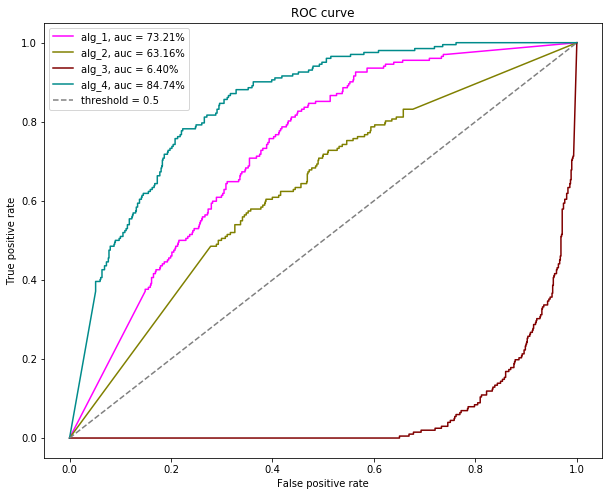

In [7]:
#c
gtt = data['gt'].values.reshape(-1,1)
ag1 = data['alg_1'].values.reshape(-1,1)
ag2 = data['alg_2'].values.reshape(-1,1)
ag3 = data['alg_3'].values.reshape(-1,1)
ag4 = data['alg_4'].values.reshape(-1,1)

plt.figure(figsize=(10,8))
fpr, tpr, _ = metrics.roc_curve(gtt, ag1)
plt.plot(fpr, tpr, color = "magenta", label = "alg_1, auc = {0:.2f}%".format(score1 * 100))

fpr, tpr, _ = metrics.roc_curve(gtt, ag2)
plt.plot(fpr, tpr, color = "olive", label = "alg_2, auc = {0:.2f}%".format(score2 * 100))

fpr, tpr, _ = metrics.roc_curve(gtt, ag3)
plt.plot(fpr, tpr, color = "maroon", label = "alg_3, auc = {0:.2f}%".format(score3 * 100))

fpr, tpr, _ = metrics.roc_curve(gtt, ag4)
plt.plot(fpr, tpr, color = "darkcyan", label = "alg_4, auc = {0:.2f}%".format(score4 * 100))

plt.plot([0, 1], [0, 1], color = "gray", linestyle = '--', label = "threshold = 0.5")

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="upper left")
plt.show()